<h1>Random Imputation</h1>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('train.csv' , usecols=['Age' , 'Fare' , 'Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [7]:
X = df.drop(columns=['Survived'])
Y = df['Survived']

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [9]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [14]:
X_train['Age_imputed'][X_train['Age'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\gaurav gupta\AppData\Local\Temp\ipykernel_7076\727074008.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_test['Age_imputed'][X_test['Age'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values


In [15]:
X_test.sample(10)

,Age,Fare,Age_imputed
387,36.00,13.000,36.00
518,36.00,26.000,36.00
773,NaN,7.225,49.00
305,0.92,151.550,0.92
16,2.00,29.125,2.00
94,59.00,7.250,59.00
217,42.00,27.000,42.00
639,NaN,16.100,32.00
419,10.00,24.150,10.00
632,32.00,30.500,32.00


C:\Users\gaurav gupta\AppData\Local\Temp\ipykernel_7076\882274319.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'] , label='Original' , hist=False)
C:\Users\gaurav gupta\AppData\Local\Temp\ipykernel_7076\882274319.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

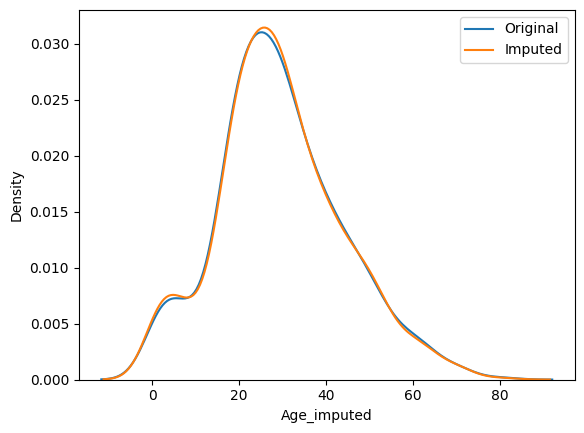

In [19]:
sns.distplot(X_train['Age'] , label='Original' , hist=False)
sns.distplot(X_train['Age_imputed'] , label='Imputed' , hist=False)

plt.legend()
plt.show()

In [20]:
print('Original age variance : ',X_train['Age'].var())
print('Imputed age variance : ',X_train['Age_imputed'].var())


Original age variance :  208.1631721825053
Imputed age variance :  207.57265753804577


In [21]:
X_train[['Fare' , 'Age' , 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2650.379845,91.290322,69.656924
Age,91.290322,208.163172,208.163172
Age_imputed,69.656924,208.163172,207.572658


<Axes: >

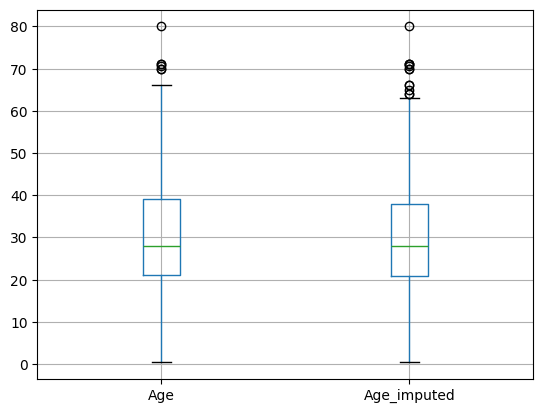

In [22]:
X_train[['Age' , 'Age_imputed']].boxplot()

In [23]:
data = pd.read_csv('house-train.csv' , usecols=['GarageQual' , 'FireplaceQu' , 'SalePrice'])

In [24]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [25]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [26]:
X = data
Y = data['SalePrice']

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [28]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [29]:
X_train.head()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,TA,NaN
504,Fa,TA,147000,TA,Fa
1413,Gd,TA,257000,TA,Gd
1389,Gd,TA,131000,TA,Gd


In [30]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\gaurav gupta\AppData\Local\Temp\ipykernel_7076\2056505658.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['Gar

In [31]:
temp = pd.concat([
    X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
    X_train['GarageQual_imputed'].value_counts() / len(X_train)
],axis=1)

temp.columns = ['Original' , 'Imputed']

In [32]:
temp

,Original,Imputed
TA,0.951043,0.952055
Fa,0.037171,0.036815
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [37]:
temp = pd.concat([
    X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
    X_train['FireplaceQu_imputed'].value_counts() / len(X_train)
],axis=1)

temp.columns = ['Original' , 'Imputed']

In [38]:
temp

,Original,Imputed
Gd,0.494272,0.493151
TA,0.412439,0.416952
Fa,0.040917,0.038527
Po,0.027823,0.027397
Ex,0.024550,0.023973


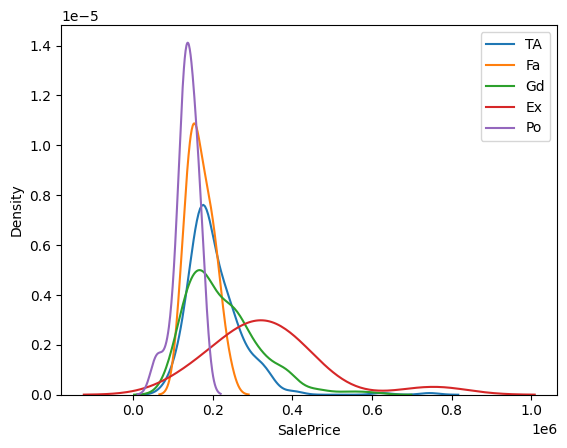

In [43]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice']  , label=category )

plt.legend()
plt.show()

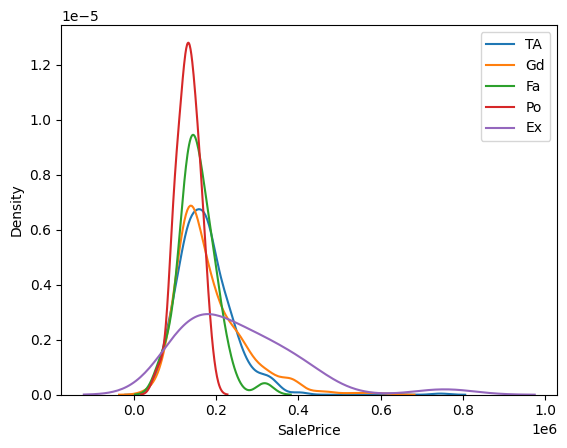

In [44]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice']  , label=category )

plt.legend()
plt.show()

<h1>Missing Indicator</h1>

In [50]:
from sklearn.impute import SimpleImputer,MissingIndicator

In [51]:
df = pd.read_csv('train.csv' , usecols=['Age' , 'Fare' , 'Survived'])

In [52]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [53]:
X = df.drop(columns=['Survived'])
Y = df['Survived']

In [54]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [55]:
X_train.head()

,Age,Fare
57,28.5,7.2292
717,27.0,10.5000
431,NaN,16.1000
633,NaN,0.0000
163,17.0,8.6625


In [56]:
si = SimpleImputer()
X_train_trf = si.fit_transform(X_train)
X_test_trf = si.fit_transform(X_test)

In [58]:
from sklearn.linear_model import LogisticRegression

In [62]:
clf = LogisticRegression()

clf.fit(X_train_trf,Y_train)
Y_pred = clf.predict(X_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test , Y_pred)

0.7430167597765364

In [63]:
mi = MissingIndicator()
mi.fit(X_train)

MissingIndicator()

In [67]:
mi.features_

array([0])

In [64]:
X_train_mi = mi.transform(X_train)
X_test_mi = mi.transform(X_test)

In [ ]:
X_train_mi

In [68]:
X_train['Age_NA'] = X_train_mi
X_test['Age_NA'] = X_test_mi

In [71]:
X_test

,Age,Fare,Age_NA
590,35.0,7.1250,False
131,20.0,7.0500,False
628,26.0,7.8958,False
195,58.0,146.5208,False
230,35.0,83.4750,False
...,...,...,...
456,65.0,26.5500,False
191,19.0,13.0000,False
603,44.0,8.0500,False
94,59.0,7.2500,False


In [72]:
si = SimpleImputer()
X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.fit_transform(X_test)

In [73]:
clf = LogisticRegression()

clf.fit(X_train_trf2,Y_train)
Y_pred = clf.predict(X_test_trf2)

# from sklearn.metrics import accuracy_score
accuracy_score(Y_test , Y_pred)

0.7486033519553073

In [74]:
si = SimpleImputer(add_indicator=True)

In [75]:
X_train = si.fit_transform(X_train)
X_test = si.fit_transform(X_test)

In [76]:
clf = LogisticRegression()

clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test , Y_pred)

0.7486033519553073